<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and KNN - Train/Test Split

---

# Introduction

To evaluate how our models would perform on new data, we split our data into a training set and a test set, train only on the training set, and evaluate on the test set. In $k$-fold cross validation we repeat this process $k$ times, using a different subset of our data as the test set each time.

We use this process to compare multiple models on the same data set. Those models could be variations on a single type (e.g. linear regression models with and without a particular feature), or they could be of completely different types.

Recall that k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression Practice

In this given task, you will be asked to model the median home price of various houses across U.S. Census tracts in the city of Boston.

In [1]:
import matplotlib.pyplot as plt

% matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn import metrics

boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

- Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it ought to be pretty clean, but we should always perform exploratory data analysis.

**Items to include:**

- Data shape
- Data types
- Count of null values by column
- Basic summary statistics
- Number of unique values for each column
- Plot of the distribution of each column (e.g. histogram, bar plot, or box plot)
- Scatterplot of each column with median price

In [3]:
print("shape of data: ",X.shape)

shape of data:  (506, 13)


In [4]:
print("dtypes of data: ",X.dtypes)

dtypes of data:  CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object


In [5]:
print("null values in data: ",X.isnull().sum())

null values in data:  CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64


In [6]:
print("summary stats of data: ", X.describe())

summary stats of data:               CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.647423   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std

distribution of each column: 


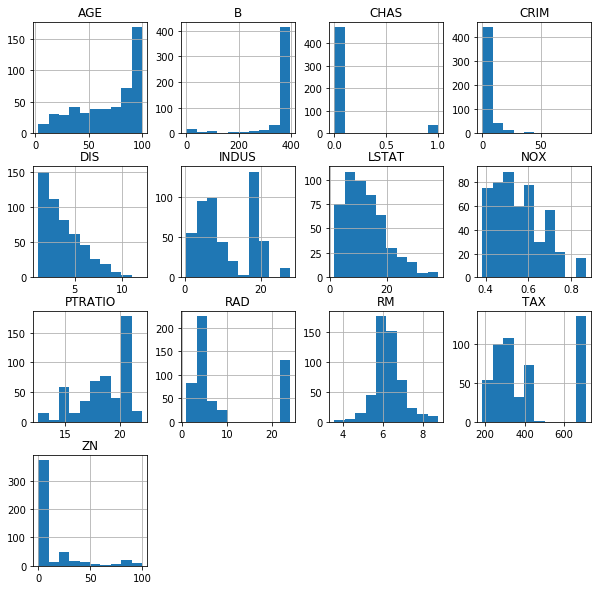

In [7]:
print("distribution of each column: ")

X.hist(figsize=(10,10),bins=10);

In [8]:
data = X.merge(y, left_index=True, right_index=True)

scatter plot of each column with median price: 


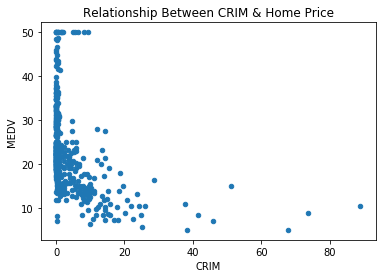

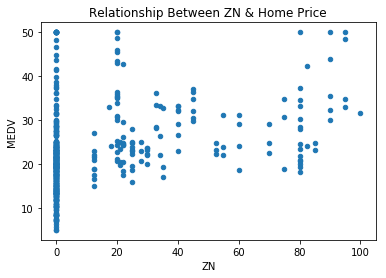

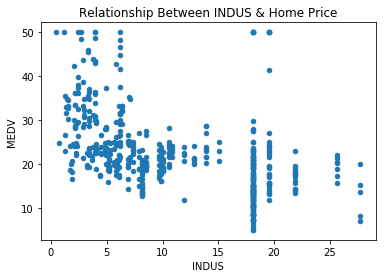

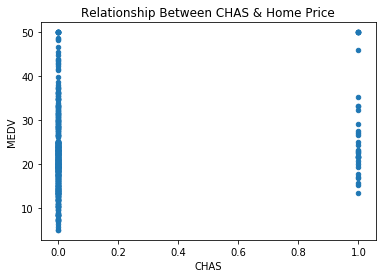

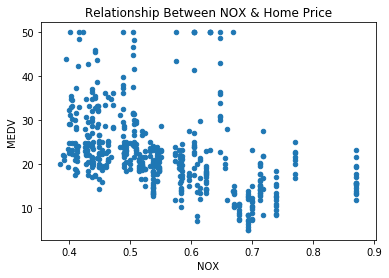

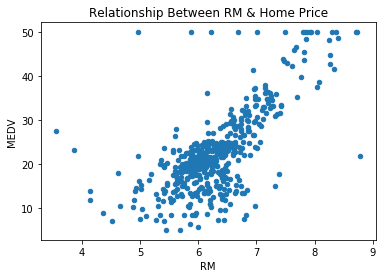

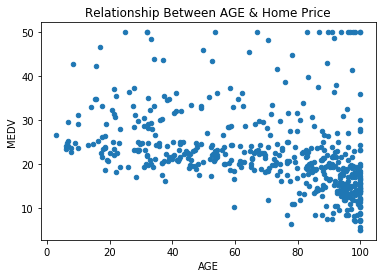

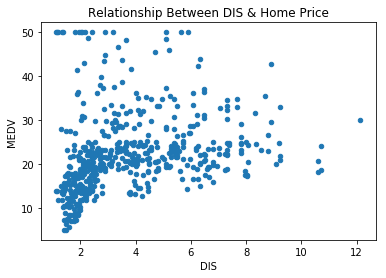

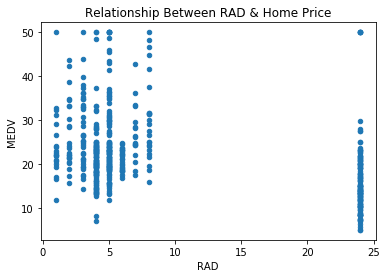

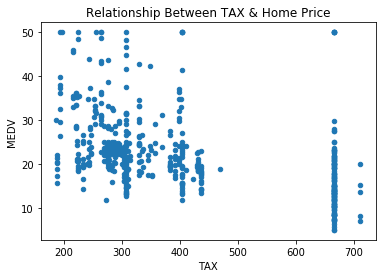

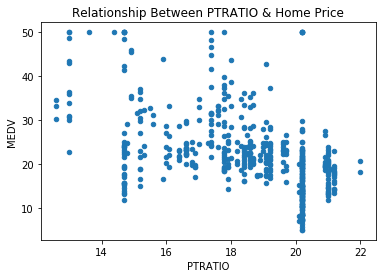

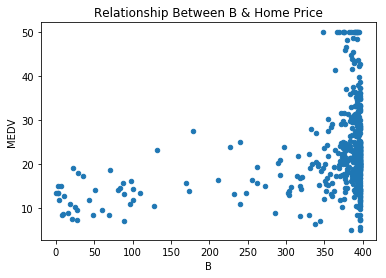

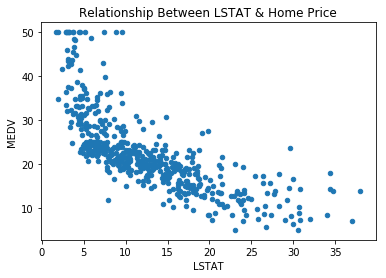

In [9]:
print("scatter plot of each column with median price: " )

for columnn in X.columns:
    data.plot(kind='scatter',x=columnn, y = 'MEDV',title="Relationship Between " + columnn + " & Home Price")

- Get the MSE of a null model that simply predicts the mean value of MEDV. (You could do a train/test split here, but it won't make much difference for such a simple model.)

In [11]:
null_pred = np.zeros(len(y)) + np.mean(y["MEDV"])
null_mse = metrics.mean_squared_error(y,null_pred)
null_mse

84.41955615616554

- Develop a linear regression model to predict MEDV. Train it on 70% of the data. Gets its MSE on both that 70% and the other 30%.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

#Step 1: Use train_test_split model to split X & y into training and testing (70/30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=456)

#Step 2: instantiate a LinearRegression model
linreg = LinearRegression()

#Step 3: Traing model on X and Y training data
linreg.fit(X_train, y_train)

#Step 4: See how the model performs on predicting the values for the training (70%) and testing (30%) data
#Step 4a: Predict y based on the testing data
y_pred_70 = linreg.predict(X_train)
#Step 4b: Get MSE of these predictions by comparing actual y from the testing set with the predicted y
mse_70 = metrics.mean_squared_error(y_train, y_pred_70)

#Step 4c: Predict y based on the testing data
y_pred_30 = linreg.predict(X_test)
#Step 4d: Get MSE of these predictions by comparing actual y from the training set with the predicted y
mse_30 = metrics.mean_squared_error(y_test, y_pred_30)

print("MSE on Training Data: ", mse_70)
print("MSE on Testing Data: ", mse_30)

MSE on Training Data:  20.845771822568903
MSE on Testing Data:  25.40735887887116


- K-fold cross-validation is slower than a simple train/test split, but it gives more reliable estimates of generalization error. Use ten-fold cross-validation to evaluate your model's MSE on both training and test data. Use this result to answer the following questions.

In [13]:
from sklearn import model_selection #import model_selection form sklearn

kf = (model_selection.KFold( #instantiate the KFold method
    n_splits=10, #define # of K folds (10)
    shuffle=True, #shuffle=True shuffles the source data (in case it is ordered in some way)
    random_state=7) #set random state to get consistent results
     ) 

#list to store the MSE of each prediction on the 10 sets of training data
mse_scores_train = []

for train_indices, test_indices in kf.split(X,y): #split X & y in training and testing sets
    lr=LinearRegression() #instantiate LinearRegression() model
    
    X_train = X.iloc[train_indices,:] #locate training data
    y_train = y.iloc[train_indices] #locate values model will try predicting
    
    lr.fit(X_train,y_train) #fit model on feature data & prediction data
        
    X_test = X.iloc[test_indices,:] 
    y_test = y.iloc[test_indices]
    
    y_pred = lr.predict(X_train) #use model to predict price based on training data
    
    mse = metrics.mean_squared_error(y_train, y_pred) #get MSE of prediction
    mse_scores_train.append(mse)

print("MSE of Predictions Based on Training Set: ", np.array(mse_scores_train).mean())

mse_scores_test = []

for train_indices, test_indices in kf.split(X,y):
    lr=LinearRegression() #instantiate LinearRegression() model
    
    X_train = X.iloc[train_indices,:] #locate training data
    y_train = y.iloc[train_indices] #locate values model will try predicting
    
    lr.fit(X_train,y_train) #fit model on feature data & prediction data from training set
        
    X_test = X.iloc[test_indices,:] #locate feature set and prediction set in testing data
    y_test = y.iloc[test_indices]
    
    y_pred = lr.predict(X_test) #use model to predict price based on testing data
    
    mse = metrics.mean_squared_error(y_test, y_pred) #get MSE of prediction
    mse_scores_test.append(mse)

print("MSE of Predictions Based on Testing Set: ", np.array(mse_scores_test).mean())

MSE of Predictions Based on Training Set:  21.800901991277215
MSE of Predictions Based on Testing Set:  23.749744979782392


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

- **Null MSE:** 84.4
- **KFold Training Set MSE:** 21.8

- Based on the above, the model performed better compared to the null model. By not simply using the mean, it has a lower bias when making predictions

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

- **KFold Training Set MSE:** 21.8
- **KFold Training Set MSE:** 23.7

- Based on the above, the model performed better on the training set compared to the test set. MSE was close, which shows that there is some model variance. Bias of model cannot be determined since sample size does not change bias.  

- How much of a bias problem does your model appear to have? Why do you say that?

**Model does not appear to have a large bias - it has a low difference between MSE on the training and test set**

- How much of a variance problem does your model appear to have? Why do you say that?

In [108]:
arr = mse_scores_test
np.std(arr)

11.13300029974859

**While the average across the 10 splits is close to the training set MSE, the standard deviation across the 10 MSE scores is high leading me to believe the model has a a variance problem**

- Add or remove variables from your model to address this problem, and get its test-set MSE using ten-fold cross validation. Did your model get better or worse? By how much?

In [14]:
feature_cols = ["CRIM", "AGE", "TAX","RM"]

X_feature_selection = data.loc[:,feature_cols]
y = data.loc[:,"MEDV"]

from sklearn import model_selection #import model_selection form sklearn

kf = (model_selection.KFold( #instantiate the KFold method
    n_splits=10, #define # of K folds (10)
    shuffle=True, #shuffle=True shuffles the source data (in case it is ordered in some way)
    random_state=7) #set random state to get consistent results
     ) 

#list to store the MSE of each prediction on the 10 sets of training data
mse_scores_train = []

for train_indices, test_indices in kf.split(X_feature_selection,y): #split X & y in training and testing sets
    lr=LinearRegression() #instantiate LinearRegression() model
    
    X_train = X_feature_selection.iloc[train_indices,:] #locate training data
    y_train = y.iloc[train_indices] #locate values model will try predicting
    
    lr.fit(X_train,y_train) #fit model on feature data & prediction data
        
    X_test = X_feature_selection.iloc[test_indices,:] 
    y_test = X_feature_selection.iloc[test_indices]
    
    y_pred = lr.predict(X_train) #use model to predict price based on training data
    
    mse = metrics.mean_squared_error(y_train, y_pred) #get MSE of prediction
    mse_scores_train.append(mse)

print("MSE of Predictions Based on Training Set Using Only CRIM, AGE, TAX, & RM: ", np.array(mse_scores_train).mean())


MSE of Predictions Based on Training Set Using Only CRIM, AGE, TAX, & RM:  35.48322143632636


**MSE on Training Data, Using All Data Columns:** 21.8 

**MSE on Training Data, Using Selected Columns:** 35.5

- Based on above, model performed worse when giving fewer features to built a prediciton on

- **Bonus:** Find a *transformation* of one of more of your feature variables that allows you to create a model that performs better on the test set than your previous model. 

Possible examples:
    - Square a column
    - Take the square root of a column
    - Take the logarithm of a column
    - Multiply two columns together

Tip: Look at scatterplots of MEDV against your column(s) before and after applying the transformation. The transformation should help if it makes the relationship more linear.

# KNN Practice

In [109]:
# Read the iris data into a DataFrame
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [110]:
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [111]:
# Increase the default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [112]:
# Create a custom colormap
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

- Map each iris species to a number. Let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and assign the result to a column called 'species_num'.

In [113]:
species_dict = {'Iris-setosa':0,'Iris-versicolor': 1, 'Iris-virginica':2}
iris.loc[:,"species_num"] = iris["species"].map(species_dict)

In [114]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2
149,5.9,3.0,5.1,1.8,Iris-virginica,2


- Clean Up Data and Perform Exporatory Data Analysis

**Items to include:**

- Data shape
- Data types
- Count of null values by column
- Basic summary statistics
- Number of unique values for each column
- Plot of the distribution of each column (e.g. histogram, bar plot, or box plot) grouped by species

In [23]:
iris.shape

(150, 6)

In [24]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
species_num       int64
dtype: object

In [25]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
species_num     0
dtype: int64

In [26]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_num
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


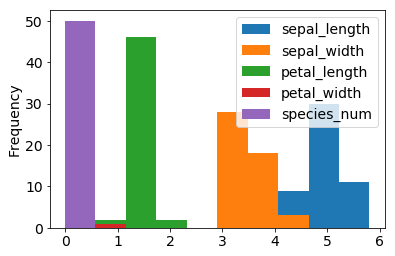

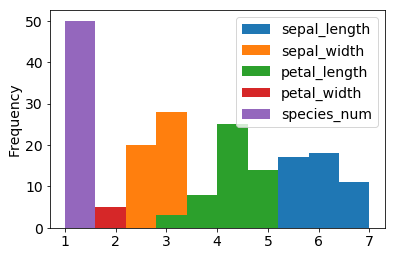

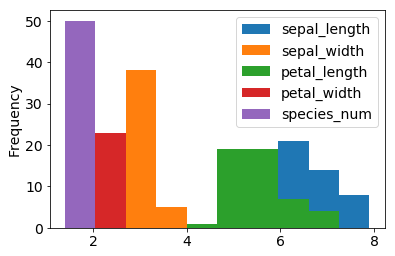

In [27]:
iris.groupby("species").plot(kind="hist");

- Get the accuracy of a null model that simply predicts the most common species.

In [28]:
null_pred = np.zeros(len(iris)) + np.mean(iris["species_num"])
null_mse = metrics.mean_squared_error(iris["species_num"],null_pred)
null_mse

0.6666666666666666

In [29]:
iris["null_pred"] = np.mean(iris["species_num"])
iris["accuracy"] = np.where(iris["species_num"] == iris["null_pred"],1,0)

print("Accuracy of Predicting Based on the Average: ", iris["accuracy"].mean())

Accuracy of Predicting Based on the Average:  0.3333333333333333


- Develop a KNN model to predict species. Use ten-fold cross-validation to evaluate your model's accuracy on both training and test data. Remember to standardize your feature variables!

In [99]:
# Import estimator class and other sklearn tools
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [120]:
#set up data for model
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

species_dict = {'Iris-setosa':0,'Iris-versicolor': 1, 'Iris-virginica':2}
iris.loc[:,"species_num"] = iris["species"].map(species_dict)

feature_cols = [x for x in iris.columns if x not in ["species","species_num"]]

X = iris.loc[:,feature_cols]
y = iris.loc[:, "species_num"]


kf = (model_selection.KFold( #instantiate the KFold method
    n_splits=10, #define # of K folds (10)
    shuffle=True, #shuffle=True shuffles the source data (in case it is ordered in some way)
    random_state=7) #set random state to get consistent results
     ) 

#list to store the MSE of each prediction on the 10 sets of training data
mse_scores_train = []

for train_indices, test_indices in kf.split(X,y): #split X & y in training and testing sets
    knn = KNeighborsClassifier(n_neighbors=1) #instantiate knn model
    
    X_train = X.iloc[train_indices,:] #locate training data
    y_train = y.iloc[train_indices] #locate values model will try predicting
    
    knn.fit(X_train,y_train) #fit model on feature data & prediction data
    
    y_pred = knn.predict(X_train) #use model to predict price based on training data
    
    mse = metrics.mean_squared_error(y_train, y_pred) #get MSE of prediction
    mse_scores_train.append(mse)

print("MSE of Predictions Based on Training Set: ", np.array(mse_scores_train).mean())

mse_scores_test = []

for train_indices, test_indices in kf.split(X,y):
    knn = KNeighborsClassifier(n_neighbors=1) #instantiate knn model
    
    X_train = X.iloc[train_indices,:] #locate training data
    y_train = y.iloc[train_indices] #locate values model will try predicting
    
    knn.fit(X_train,y_train) #fit model on feature data & prediction data from training set
        
    X_test = X.iloc[test_indices,:] #locate feature set and prediction set in testing data
    y_test = y.iloc[test_indices]
    
    y_pred = knn.predict(X_test) #use model to predict price based on testing data
    
    mse = metrics.mean_squared_error(y_test, y_pred) #get MSE of prediction
    mse_scores_test.append(mse)

print("MSE of Predictions Based on Testing Set: ", np.array(mse_scores_test).mean())

MSE of Predictions Based on Training Set:  0.0
MSE of Predictions Based on Testing Set:  0.039999999999999994


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

**MSE Null Prediction:** 0.66

**MSE Training Set:** 0.0

- Feature columns offer an excellent way of predicting species type. **Low bias.**

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

**MSE Training Set:** 0.0

**MSE Test Set:** 0.0399

- Even on the test set, model has a low MSE compared to null pred. **Low bias**

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

**- More of a variance problem since there is some spread between the 10 MSEs from ten-fold cross val**

- Adjust $k$ to address this problem, and get the resulting test-set accuracy using ten-fold cross validation. Did your model get better or worse? By how much?

In [125]:
#set up data for model
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

species_dict = {'Iris-setosa':0,'Iris-versicolor': 1, 'Iris-virginica':2}
iris.loc[:,"species_num"] = iris["species"].map(species_dict)

feature_cols = [x for x in iris.columns if x not in ["species","species_num"]]

X = iris.loc[:,feature_cols]
y = iris.loc[:, "species_num"]


kf = (model_selection.KFold( #instantiate the KFold method
    n_splits=10, #define # of K folds (10)
    shuffle=True, #shuffle=True shuffles the source data (in case it is ordered in some way)
    random_state=7) #set random state to get consistent results
     ) 

num_k = [1,5,10]

for k_val in num_k:
    

    mse_scores_train = []

    for train_indices, test_indices in kf.split(X,y): #split X & y in training and testing sets
        knn = KNeighborsClassifier(n_neighbors=k_val) #instantiate knn model

        X_train = X.iloc[train_indices,:] #locate training data
        y_train = y.iloc[train_indices] #locate values model will try predicting

        knn.fit(X_train,y_train) #fit model on feature data & prediction data

        y_pred = knn.predict(X_train) #use model to predict price based on training data

        mse = metrics.mean_squared_error(y_train, y_pred) #get MSE of prediction
        mse_scores_train.append(mse)

    print("MSE of Predictions Based on Training Set with {} KNN: ".format(k_val), np.array(mse_scores_train).mean())

MSE of Predictions Based on Training Set with 1 KNN:  0.0
MSE of Predictions Based on Training Set with 5 KNN:  0.031111111111111117
MSE of Predictions Based on Training Set with 10 KNN:  0.022222222222222223


**MSE on Training Data When K=1:** 0.0

**MSE on Training Data When K=5:** 0.031

**MSE on Training Data When K=10:** 0.022

- Plot your model's test-set accuracy across a range of $k$ values using ten-fold cross validation. Use a large enough range of $k$ values to provide reasonable assurance that making $k$ larger would not help.

Tip: Use functions and loops to avoid writing duplicate code.

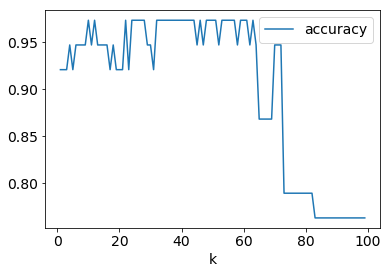

In [98]:
accuracy = []
for k in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=k) #instantiate model with various n_neighbor values
    knn.fit(X_train, y_train) #fit the model on the training data
    pred = knn.predict(X_test) #use the model to predict based on the testing data
    score = float(sum(pred == y_test)) / len(y_test) #check prediction accuracy
    accuracy.append([k, score]) #store the k and accuracy score

scores_df = pd.DataFrame(accuracy, columns=['k', 'accuracy'])
ax = scores_df.plot(kind='line', x='k', y='accuracy')

- **Bonus:** Find a *transformation* of one of more of your feature variables that allows you to create a model that performs better on the test set than your previous model. 

Possible examples:
    - Square a column
    - Take the square root of a column
    - Take the logarithm of a column
    - Multiply two columns together

## Bonus

`scikit-learn` is the most popular machine learning library in Python, but there are alternative packages that have different strengths. 

### Example: Using the Statsmodels Formula

In [ ]:
# First, format our data in a DataFrame

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.loc[:, 'MEDV'] = boston.target
df.head()

In [ ]:
# Set up our new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

### Bonus Challenge #1:

Can you optimize your R2, selecting the best features and using either test-train split or k-folds?

### Bonus Challenge #2:

Given a combination of predictors, can you find another response variable that can be accurately predicted through the exploration of different predictors in this data set?

_Tip: Check out pairplots, coefficients, and Pearson scores._

In [ ]:
# Check out variable relations
import seaborn as sns

sns.pairplot(X);

In [ ]:
# Check out Pearson scores


### Demo: Patsy

In [ ]:
import patsy

# Add response to the core DataFrame
df.loc[:, 'MEDV'] = y

In [ ]:
from sklearn.model_selection import train_test_split #If you didn't import it earlier, do so now

# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("MEDV ~ AGE + RM", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


In [ ]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Rerun your model, iteratively changing your variables and train_size from the previous cell

lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))